Download stock data from 10 companies

In [281]:
import bs4 as bs
import pickle
import requests
def save_tickers():
    tickers = ['NKE','PTON','SFM','BGFV','UNFI','NLS','JOUT','HLF','BFIT','LULU']
    with open("tickers.pickle",'wb') as f:
        pickle.dump(tickers, f)
    return tickers

save_tickers()

['NKE', 'PTON', 'SFM', 'BGFV', 'UNFI', 'NLS', 'JOUT', 'HLF', 'BFIT', 'LULU']

LOAD DATA:

In [282]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
def fetch_data():
    with open("tickers.pickle",'rb') as f:
        tickers=pickle.load(f)

    if not os.path.exists('stock_details'):
        os.makedirs('stock_details')
    count=10

    start= dt.datetime(2017,1,1)
    end=dt.datetime(2019,12,31)
    count=0
    for ticker in tickers:
        if count==10:
            break
        count+=1
        print(ticker)
        try:
            df=web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_details/{}.csv'.format(ticker))
        except:
            print("Error")
            continue

fetch_data()

NKE
PTON
SFM
BGFV
UNFI
NLS
JOUT
HLF
BFIT
LULU


Data Adjustment

In [283]:
import os
import pandas as pd
import pickle


def compile():
	with open("tickers.pickle",'rb') as f:
			tickers=pickle.load(f)


	main_df=pd.DataFrame()

	for count,ticker in enumerate(tickers):
		if 'LULU' in ticker:
			continue
		if not os.path.exists('stock_details/{}.csv'.format(ticker)):
			continue
		df=pd.read_csv('stock_details/{}.csv'.format(ticker))
		df.set_index('Date',inplace=True)

		df.rename(columns={'Adj Close': ticker}, inplace=True)
		df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

		
		if main_df.empty:
			main_df=df
		else:
			main_df=main_df.join(df,how='outer')

	print(main_df.head())
	main_df.to_csv('Dataset_temp.csv')

compile()

                  NKE  PTON        SFM       BGFV       UNFI        NLS  \
Date                                                                      
2017-01-03  49.616077   NaN  19.490000  12.698511  47.840000  19.100000   
2017-01-04  50.656517   NaN  19.490000  13.113005  48.119999  19.549999   
2017-01-05  50.646969   NaN  19.549999  12.359383  47.419998  18.950001   
2017-01-06  51.458313   NaN  19.510000  11.869528  47.009998  18.299999   
2017-01-09  50.952415   NaN  19.450001  11.756486  47.900002  16.850000   

                 JOUT        HLF       BFIT  
Date                                         
2017-01-03  36.150948  24.594999  13.898443  
2017-01-04  36.420948  25.275000  13.898443  
2017-01-05  35.205948  24.764999  13.898443  
2017-01-06  34.260948  25.155001  13.898443  
2017-01-09  32.795235  24.764999  14.148917  


In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [287]:
df=pd.read_csv('dataset_target.csv',index_col=0)
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

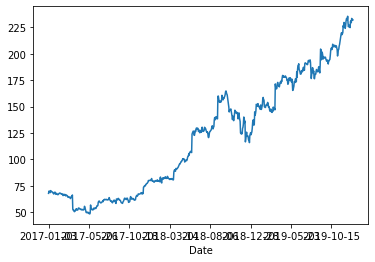

In [288]:
df['High'].plot()

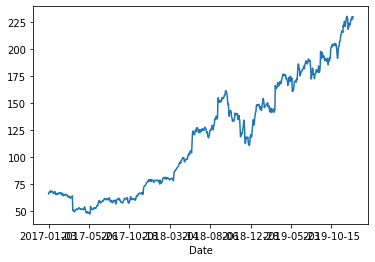

In [289]:
df['Low'].plot()

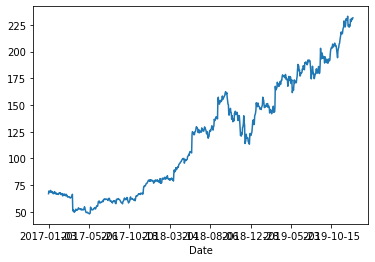

In [290]:
df['Adj Close'].plot()

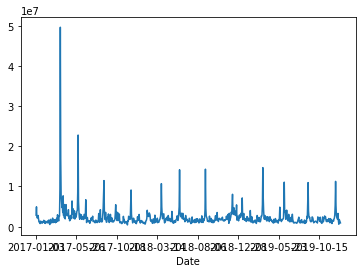

In [291]:
df['Volume'].plot()

MOVING AVG

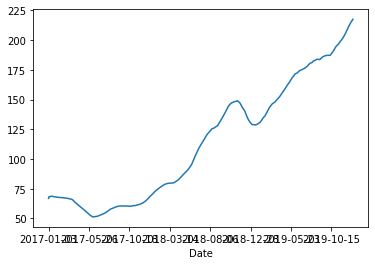

In [292]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()
df['Moving_av'].plot()

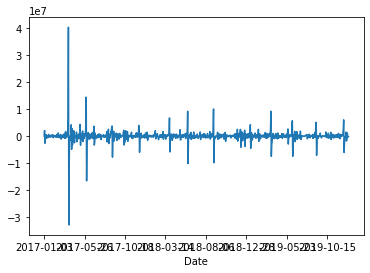

In [293]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close
df['Increase_in_vol'].plot()

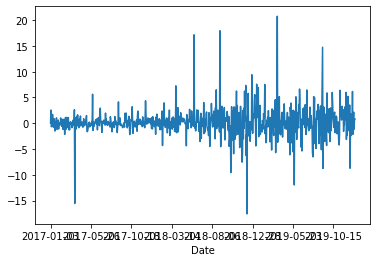

In [294]:
df['Increase_in_adj_close'].plot()

In [295]:
df.to_csv("dataset_target_2.csv",index=False)

In [296]:
df=pd.read_csv('stock_details/LULU.csv')

In [297]:
Dates=[]
i=0
while i<len(df):
    Dates.append(df.iloc[i]['Date'])
    i+=1

In [298]:
df2=pd.read_csv('dataset_target_2.csv')
df2['Date']=Dates
df2.to_csv("dataset_target_2.csv",index=False)

In [299]:
df=pd.read_csv('dataset_target.csv',index_col=0)

In [300]:
def merge():
	df1=pd.read_csv('dataset_target_2.csv',index_col='Date')

	df3=pd.read_csv('dataset_target.csv')
	df2=pd.read_csv('Dataset_temp.csv',index_col='Date')

	Dates=[]
	i=0
	while i<len(df3):
		Dates.append(df3.iloc[i]['Date'])
		i+=1
		
	
	df_new=df1.join(df2,how='outer')
	df_new.fillna(0.0)

	df_new['Date']=Dates

	df_new.to_csv('Dataset_main.csv',index=False)

merge()

In [301]:
df=pd.read_csv('Dataset_main.csv')

In [302]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'NKE', 'PTON', 'SFM',
       'BGFV', 'UNFI', 'NLS', 'JOUT', 'HLF', 'BFIT', 'Date'],
      dtype='object')

In [303]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('stock_details/LULU.csv',index_col=0,parse_dates=True)

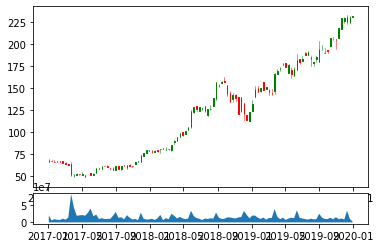

In [304]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)


Dataset Preprocessing

In [305]:
df1=pd.read_csv('dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [306]:
df2=pd.read_csv('dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'Date'],
      dtype='object')


In [307]:
df3=pd.read_csv('Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'NKE', 'PTON', 'SFM',
       'BGFV', 'UNFI', 'NLS', 'JOUT', 'HLF', 'BFIT', 'Date'],
      dtype='object')


# Regression: other stock's impact on LULU

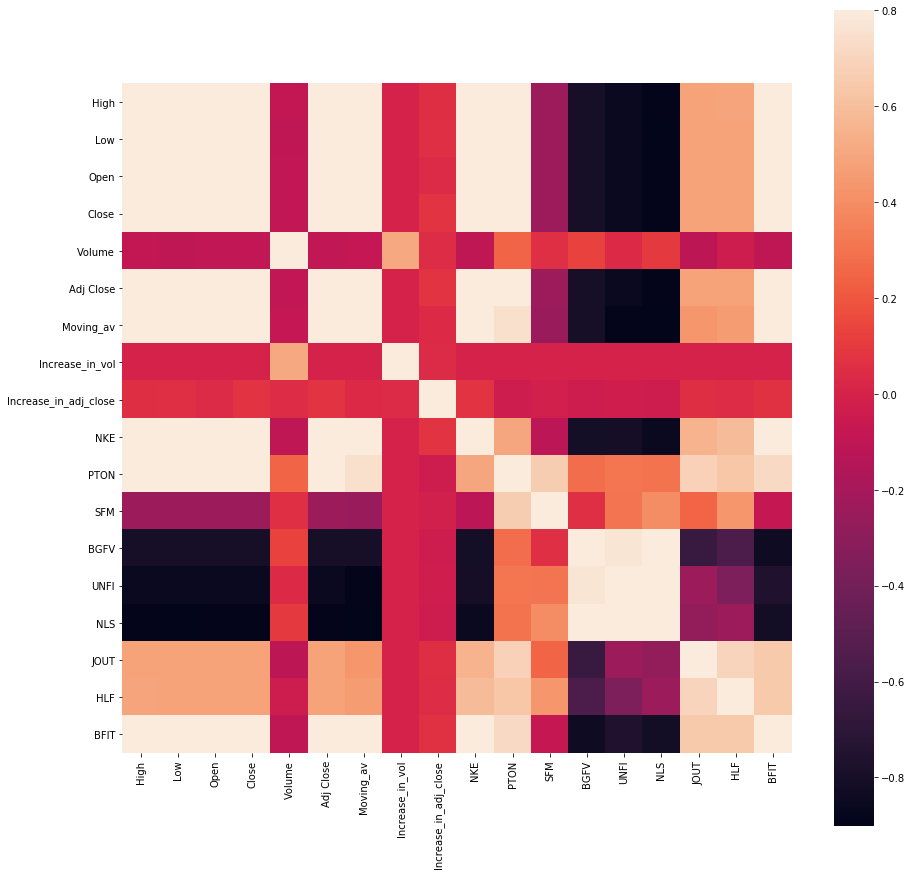

In [47]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

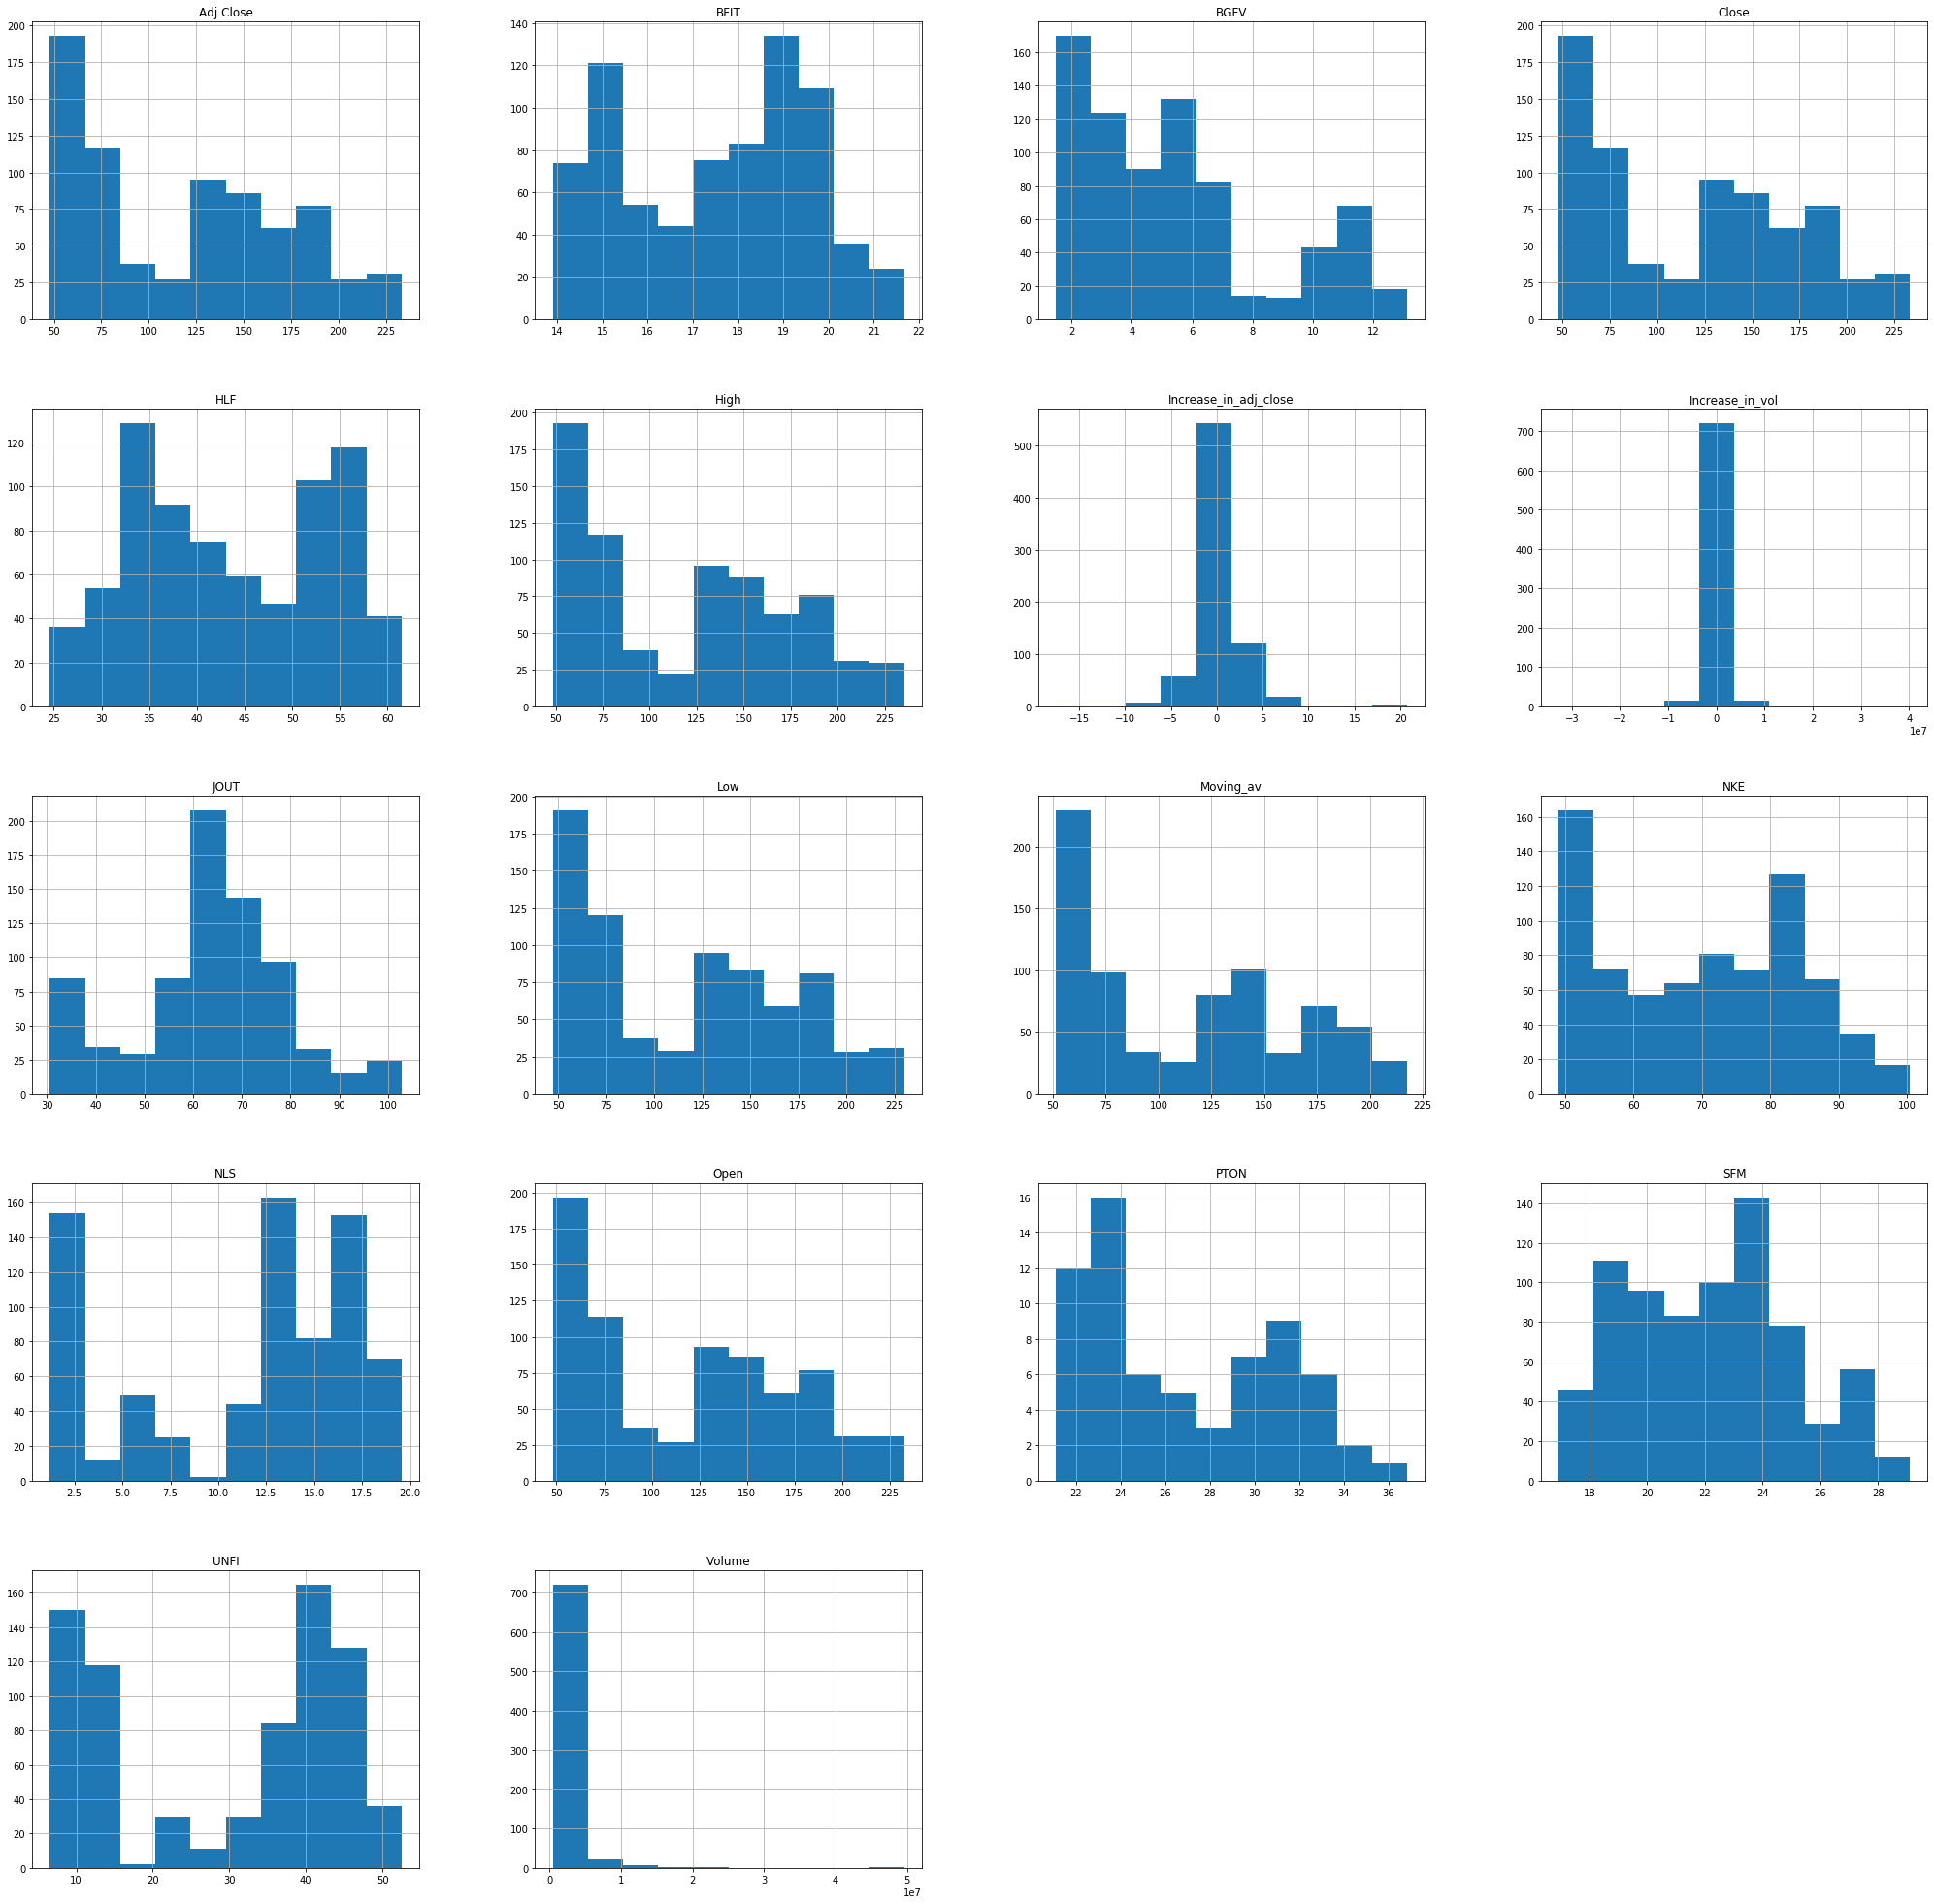

In [48]:
df3.hist(figsize = (35,35))
plt.show()

In [308]:
df3.fillna(0, inplace=True)
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
col_y=y_df.columns
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)
Drop_cols=col_y
Drop_cols=Drop_cols.tolist()
Drop_cols.append('Date')
X_df=df3.drop(Drop_cols,axis=1)

In [309]:
X_df

,Moving_av,Increase_in_vol,Increase_in_adj_close,NKE,PTON,SFM,BGFV,UNFI,NLS,JOUT,HLF,BFIT
0,66.849998,0.0,0.000000,49.616077,0.000000,19.490000,12.698511,47.840000,19.100000,36.150948,24.594999,13.898443
1,68.130001,2067600.0,2.560005,50.656517,0.000000,19.490000,13.113005,48.119999,19.549999,36.420948,25.275000,13.898443
2,68.330002,-2651800.0,-0.680000,50.646969,0.000000,19.549999,12.359383,47.419998,18.950001,35.205948,24.764999,13.898443
3,68.315001,-101600.0,-0.460007,51.458313,0.000000,19.510000,11.869528,47.009998,18.299999,34.260948,25.155001,13.898443
4,68.290001,55000.0,-0.079994,50.952415,0.000000,19.450001,11.756486,47.900002,16.850000,32.795235,24.764999,14.148917
...,...,...,...,...,...,...,...,...,...,...,...,...
749,215.482001,-839400.0,0.899994,98.993416,28.750000,19.830000,2.830173,8.440000,1.770000,75.084801,47.849998,21.649448
750,216.027601,1176900.0,2.139999,99.556892,27.000000,19.709999,2.839607,8.630000,1.670000,74.976158,48.119999,21.630598
751,216.566401,-274800.0,-1.149994,100.407051,27.000000,19.510000,2.849041,8.380000,1.670000,75.015663,47.840000,21.619682
752,217.083801,-311400.0,0.809998,99.645866,27.690001,19.540001,2.801871,8.330000,1.680000,76.032997,47.599998,21.547094


In [310]:
y_df

,High,Low,Open,Close,Volume,Adj Close
0,67.870003,65.720001,65.940002,66.849998,2871000,66.849998
1,69.989998,66.879997,66.970001,69.410004,4938600,69.410004
2,69.379997,67.360001,68.430000,68.730003,2286800,68.730003
3,69.709999,67.860001,68.739998,68.269997,2185200,68.269997
4,68.540001,67.150002,67.209999,68.190002,2240200,68.190002
...,...,...,...,...,...,...
749,229.410004,227.110001,228.470001,229.029999,613600,229.029999
750,233.419998,229.309998,229.389999,231.169998,1790500,231.169998
751,232.789993,229.759995,232.559998,230.020004,1515700,230.020004
752,231.750000,227.529999,229.800003,230.830002,1204300,230.830002


In [311]:
X=X_df.values

In [312]:
y=y_df_mod.values

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [314]:
X.shape

(754, 12)

In [315]:
y.shape

(754, 4)

In [316]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [317]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [318]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(X_train,y_train,callbacks=[callback])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_74 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_75 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 1028      
Total params: 44,900
Trainable params: 44,900
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
33/33 [==============================] - 1s 2ms/step - loss: 222.9935 - accuracy: 0.1826 - mean_absolu

In [319]:
y_pred= regressor.predict(X_test)

### FIND RMSE

In [326]:
rmsRegressionClose=np.sqrt(np.mean(np.power((np.array(y_test[3])-np.array(y_pred[3])),2)))
print("RMSE for Regression(Close): ", rmsRegressionClose)

rmsRegression = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print("RMSE for Regression: ", rmsRegression)

RMSE for Regression(Close):  37.28115895792577
RMSE for Regression:  81.92071654775069


In [327]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

High

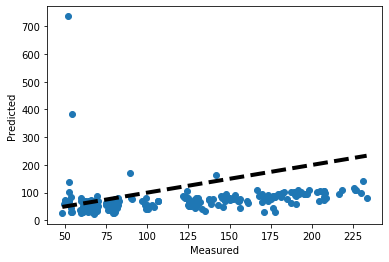

In [328]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Low

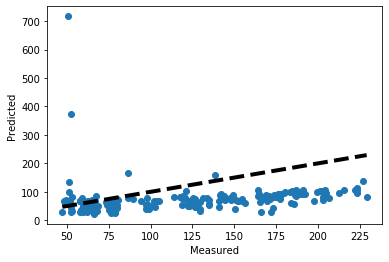

In [329]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Open

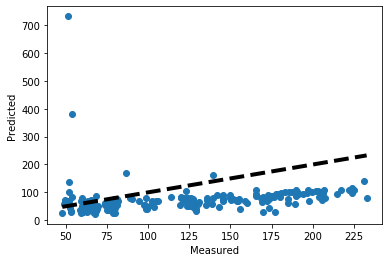

In [330]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Close

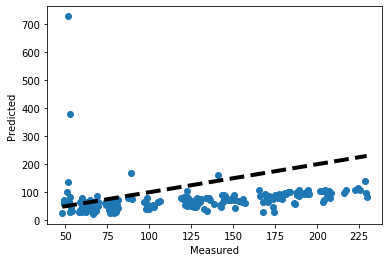

In [331]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[3], y_pred_mod[3])
ax.plot([y_test_mod[3].min(),y_test_mod[3].max()], [y_test_mod[3].min(), y_test_mod[3].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Regression done  

# RNN (Past analysis)

In [332]:
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [333]:
df1=pd.read_csv('dataset_target.csv')

In [334]:
print(df1.head())

         Date       High        Low       Open      Close   Volume  Adj Close
0  2017-01-03  67.870003  65.720001  65.940002  66.849998  2871000  66.849998
1  2017-01-04  69.989998  66.879997  66.970001  69.410004  4938600  69.410004
2  2017-01-05  69.379997  67.360001  68.430000  68.730003  2286800  68.730003
3  2017-01-06  69.709999  67.860001  68.739998  68.269997  2185200  68.269997
4  2017-01-09  68.540001  67.150002  67.209999  68.190002  2240200  68.190002


In [335]:
df2=pd.read_csv('dataset_target_2.csv')

In [336]:
print(df2.head())

        High        Low       Open      Close   Volume  Adj Close  Moving_av  \
0  67.870003  65.720001  65.940002  66.849998  2871000  66.849998  66.849998   
1  69.989998  66.879997  66.970001  69.410004  4938600  69.410004  68.130001   
2  69.379997  67.360001  68.430000  68.730003  2286800  68.730003  68.330002   
3  69.709999  67.860001  68.739998  68.269997  2185200  68.269997  68.315001   
4  68.540001  67.150002  67.209999  68.190002  2240200  68.190002  68.290001   

   Increase_in_vol  Increase_in_adj_close        Date  
0              0.0               0.000000  2017-01-03  
1        2067600.0               2.560005  2017-01-04  
2       -2651800.0              -0.680000  2017-01-05  
3        -101600.0              -0.460007  2017-01-06  
4          55000.0              -0.079994  2017-01-09  


In [337]:
df_main=df2.drop(['Date'],axis=1)

In [338]:
print(df_main.head())

        High        Low       Open      Close   Volume  Adj Close  Moving_av  \
0  67.870003  65.720001  65.940002  66.849998  2871000  66.849998  66.849998   
1  69.989998  66.879997  66.970001  69.410004  4938600  69.410004  68.130001   
2  69.379997  67.360001  68.430000  68.730003  2286800  68.730003  68.330002   
3  69.709999  67.860001  68.739998  68.269997  2185200  68.269997  68.315001   
4  68.540001  67.150002  67.209999  68.190002  2240200  68.190002  68.290001   

   Increase_in_vol  Increase_in_adj_close  
0              0.0               0.000000  
1        2067600.0               2.560005  
2       -2651800.0              -0.680000  
3        -101600.0              -0.460007  
4          55000.0              -0.079994  


In [339]:
print(len(df_main))

754


In [340]:
df_train=df_main[:603]

In [341]:
print(df_train.head())

        High        Low       Open      Close   Volume  Adj Close  Moving_av  \
0  67.870003  65.720001  65.940002  66.849998  2871000  66.849998  66.849998   
1  69.989998  66.879997  66.970001  69.410004  4938600  69.410004  68.130001   
2  69.379997  67.360001  68.430000  68.730003  2286800  68.730003  68.330002   
3  69.709999  67.860001  68.739998  68.269997  2185200  68.269997  68.315001   
4  68.540001  67.150002  67.209999  68.190002  2240200  68.190002  68.290001   

   Increase_in_vol  Increase_in_adj_close  
0              0.0               0.000000  
1        2067600.0               2.560005  
2       -2651800.0              -0.680000  
3        -101600.0              -0.460007  
4          55000.0              -0.079994  


In [342]:
sc = MinMaxScaler(feature_range = (0, 1))

In [343]:
df_target=df_train[['High','Low','Open','Close']]
target_set=df_target.values
train_set=df_train.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(553, 50, 9)
(553, 4)


In [344]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 9)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [345]:
RNN_model=model()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 64)            18944     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50, 64)            256       
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 64)            256       
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)              

In [346]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Epoch 1/2000
18/18 [==============================] - 7s 68ms/step - loss: 0.5077 - accuracy: 0.2729 - mean_squared_error: 0.5077
Epoch 2/2000
18/18 [==============================] - 1s 79ms/step - loss: 0.2753 - accuracy: 0.2445 - mean_squared_error: 0.2753
Epoch 3/2000
18/18 [==============================] - 1s 79ms/step - loss: 0.1830 - accuracy: 0.2758 - mean_squared_error: 0.1830
Epoch 4/2000
18/18 [==============================] - 1s 75ms/step - loss: 0.1214 - accuracy: 0.2488 - mean_squared_error: 0.1214
Epoch 5/2000
18/18 [==============================] - 1s 72ms/step - loss: 0.0781 - accuracy: 0.2541 - mean_squared_error: 0.0781
Epoch 6/2000
18/18 [==============================] - 2s 92ms/step - loss: 0.0527 - accuracy: 0.2411 - mean_squared_error: 0.0527
Epoch 7/2000
18/18 [==============================] - 1s 63ms/step - loss: 0.0427 - accuracy: 0.2120 - mean_squared_error: 0.0427
Epoch 8/2000
18/18 [==============================] - 1s 70ms/step - loss: 0.0292 - accura

In [347]:
df_test=df_main[603:]
df_target_test=df_test[['High','Low','Open','Close']]
target_set_test=df_target_test.values
test_set=df_test.values
test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)
X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)
predicted_stock_price = RNN_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [461]:
len(y_test)

101

In [350]:
rmsRNN_close=np.sqrt(np.mean(np.power((np.array(predicted_stock_price[3])-np.array(y_test[3])),2)))
print("RMSE CLOSE ", rmsRNN_close)
rmsRNN_open=np.sqrt(np.mean(np.power((np.array(predicted_stock_price[2])-np.array(y_test[2])),2)))
print("RMSE OPEN ", rmsRNN_open)
rmsRNN_low=np.sqrt(np.mean(np.power((np.array(predicted_stock_price[1])-np.array(y_test[1])),2)))
print("RMSE LOW ", rmsRNN_low)
rmsRNN_high=np.sqrt(np.mean(np.power((np.array(predicted_stock_price[0])-np.array(y_test[0])),2)))
print("RMSE HIGH ", rmsRNN_high)
rmsRNN=np.sqrt(np.mean(np.power((np.array(predicted_stock_price)-np.array(y_test)),2)))
print("RMSE ", rmsRNN)

RMSE CLOSE  182.0596607254151
RMSE OPEN  185.69654666429872
RMSE LOW  186.75747730731328
RMSE HIGH  182.9323078738511
RMSE  203.80715413623557


HIGH

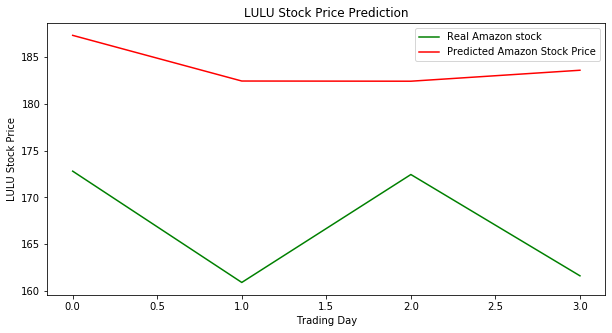

In [160]:
plt.figure(figsize=(10,5))
plt.plot(target_set_test[0], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[0], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('LULU Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('LULU Stock Price')
plt.legend()
plt.show()

Low

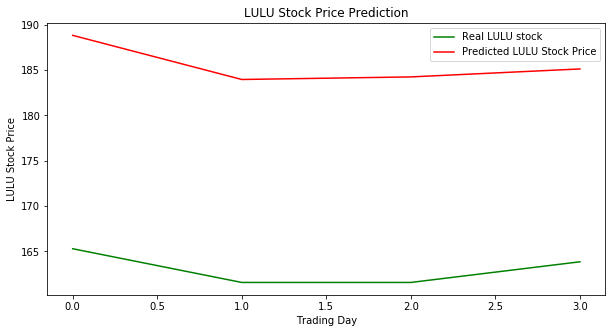

In [161]:
plt.figure(figsize=(10,5))
plt.plot(target_set_test[1], color = 'green', label = 'Real LULU stock')
plt.plot(predicted_stock_price[1], color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('LULU Stock Price')
plt.legend()
plt.show()

Open

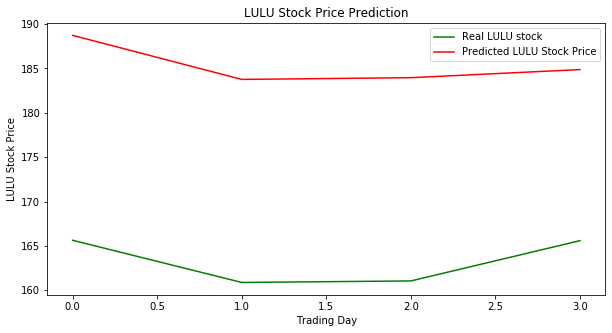

In [162]:
plt.figure(figsize=(10,5))
plt.plot(target_set_test[2], color = 'green', label = 'Real LULU stock')
plt.plot(predicted_stock_price[2], color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('LULU Stock Price')
plt.legend()
plt.show()

Close

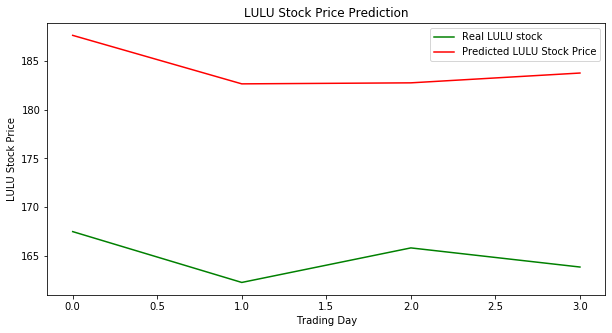

In [163]:
plt.figure(figsize=(10,5))
plt.plot(target_set_test[3], color = 'green', label = 'Real LULU stock')
plt.plot(predicted_stock_price[3], color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('LULU Stock Price')
plt.legend()
plt.show()

All Over

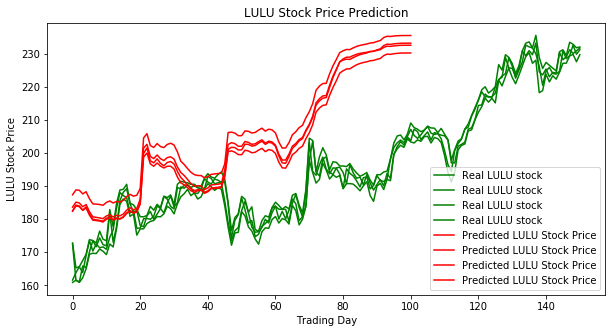

In [165]:
plt.figure(figsize=(10,5))
plt.plot(target_set_test, color = 'green', label = 'Real LULU stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('LULU Stock Price')
plt.legend()
plt.show()

In [460]:
rmsLSTM =np.sqrt(np.mean(np.power((np.array(target_set_test[:101])-np.array(predicted_stock_price)),2)))
print("rmsLSTM: ", rmsLSTM)

rmsLSTM:  20.893085238788434


## Covering ANN

In [166]:
import pandas as pd
df1=pd.read_csv("dataset_target_2.csv")
df2=pd.read_csv("dataset_target.csv")
df3=pd.read_csv('Dataset_main.csv')
df3.fillna(0, inplace=True)
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
col_y=y_df.columns
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)
Drop_cols=col_y
Drop_cols=Drop_cols.tolist()
Drop_cols.append('Date')
X_df=df3.drop(Drop_cols,axis=1)
X=X_df.values
saved_model_regressor=tf.keras.models.load_model('Regressor_model.h5')
Regressor_prediction=saved_model_regressor(X)

In [167]:
Regressor_prediction

<tf.Tensor: shape=(754, 4), dtype=float32, numpy=
array([[ 58.173744,  56.982822,  57.780865,  57.697235],
       [ 54.680824,  53.535007,  54.07701 ,  54.01593 ],
       [ 50.035843,  48.665024,  49.254593,  49.438164],
       ...,
       [234.39435 , 229.3596  , 232.7505  , 232.54573 ],
       [234.75479 , 229.70038 , 233.10292 , 232.89499 ],
       [235.96252 , 230.89856 , 234.30984 , 234.10524 ]], dtype=float32)>

In [168]:
Regressor_prediction.shape

TensorShape([754, 4])

In [169]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(Regressor_prediction)):
        y_pred_temp.append(Regressor_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))

In [171]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_regress','Low_regress','Open_regress','Close_regress'])

In [172]:
Y_pred.head()

,High_regress,Low_regress,Open_regress,Close_regress
0,58.173744,56.982822,57.780865,57.697235
1,54.680824,53.535007,54.077011,54.015930
2,50.035843,48.665024,49.254593,49.438164
3,60.378838,59.152206,59.976021,59.893944
4,60.420502,59.139008,59.992477,59.897018


In [184]:
Y_pred.to_csv('Regressor_results.csv',index=False)
df_main=df1.drop(['Date'],axis=1)
main_set=df_main.values
X_test = []

for i in range(50,len(main_set)):
    X_test.append(main_set[i-50:i,:])
    
X_test = np.array(X_test)
saved_model_RNN=tf.keras.models.load_model('RNN_model.h5')
RNN_prediction=RNN_model.predict(X_test)

In [186]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(RNN_prediction)):
        y_pred_temp.append(RNN_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))

In [187]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_RNN','Low_RNN','Open_RNN','Close_RNN'])

In [414]:
len(Y_pred)

704

In [405]:
Y_pred

,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,0.867881,0.905686,0.762889,0.953993
1,0.999957,0.999831,0.999907,0.999889
2,0.999961,0.999848,0.999884,0.999883
3,0.999966,0.999836,0.999916,0.999871
4,0.999959,0.999852,0.999835,0.999876
...,...,...,...,...
699,0.999439,0.997515,0.999504,0.997895
700,0.999735,0.998843,0.999786,0.998936
701,0.999889,0.999141,0.999937,0.999095
702,0.999973,0.999841,0.999908,0.999840


In [189]:
Y_pred.to_csv('RNN_results.csv',index=False)
df1=pd.read_csv('Regressor_results.csv')
df2=pd.read_csv('RNN_results.csv')
df1=df1[50:]
df1.to_csv('Regressor_results_mod.csv',index=False)
df1=pd.read_csv('Regressor_results_mod.csv')
df=pd.concat([df1,df2],axis=1)


In [190]:
df.head()

,High_regress,Low_regress,Open_regress,Close_regress,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,62.907845,61.546150,62.461143,62.163948,0.867881,0.905686,0.762889,0.953993
1,57.179489,55.780277,56.538528,56.395924,0.999957,0.999831,0.999907,0.999889
2,61.602165,60.270138,61.165604,60.866478,0.999961,0.999848,0.999884,0.999883
3,53.233932,51.788975,52.063957,52.761837,0.999966,0.999836,0.999916,0.999871
4,61.205879,59.891029,60.775661,60.483963,0.999959,0.999852,0.999835,0.999876


In [191]:
df1=pd.read_csv("dataset_target_2.csv")

In [192]:
target_high=[]
target_low=[]
i=50
while i<len(df1):
    target_high.append(df1.iloc[i]['High'])
    target_low.append(df1.iloc[i]['Low'])
    i+=1

In [193]:
len(target_high)

704

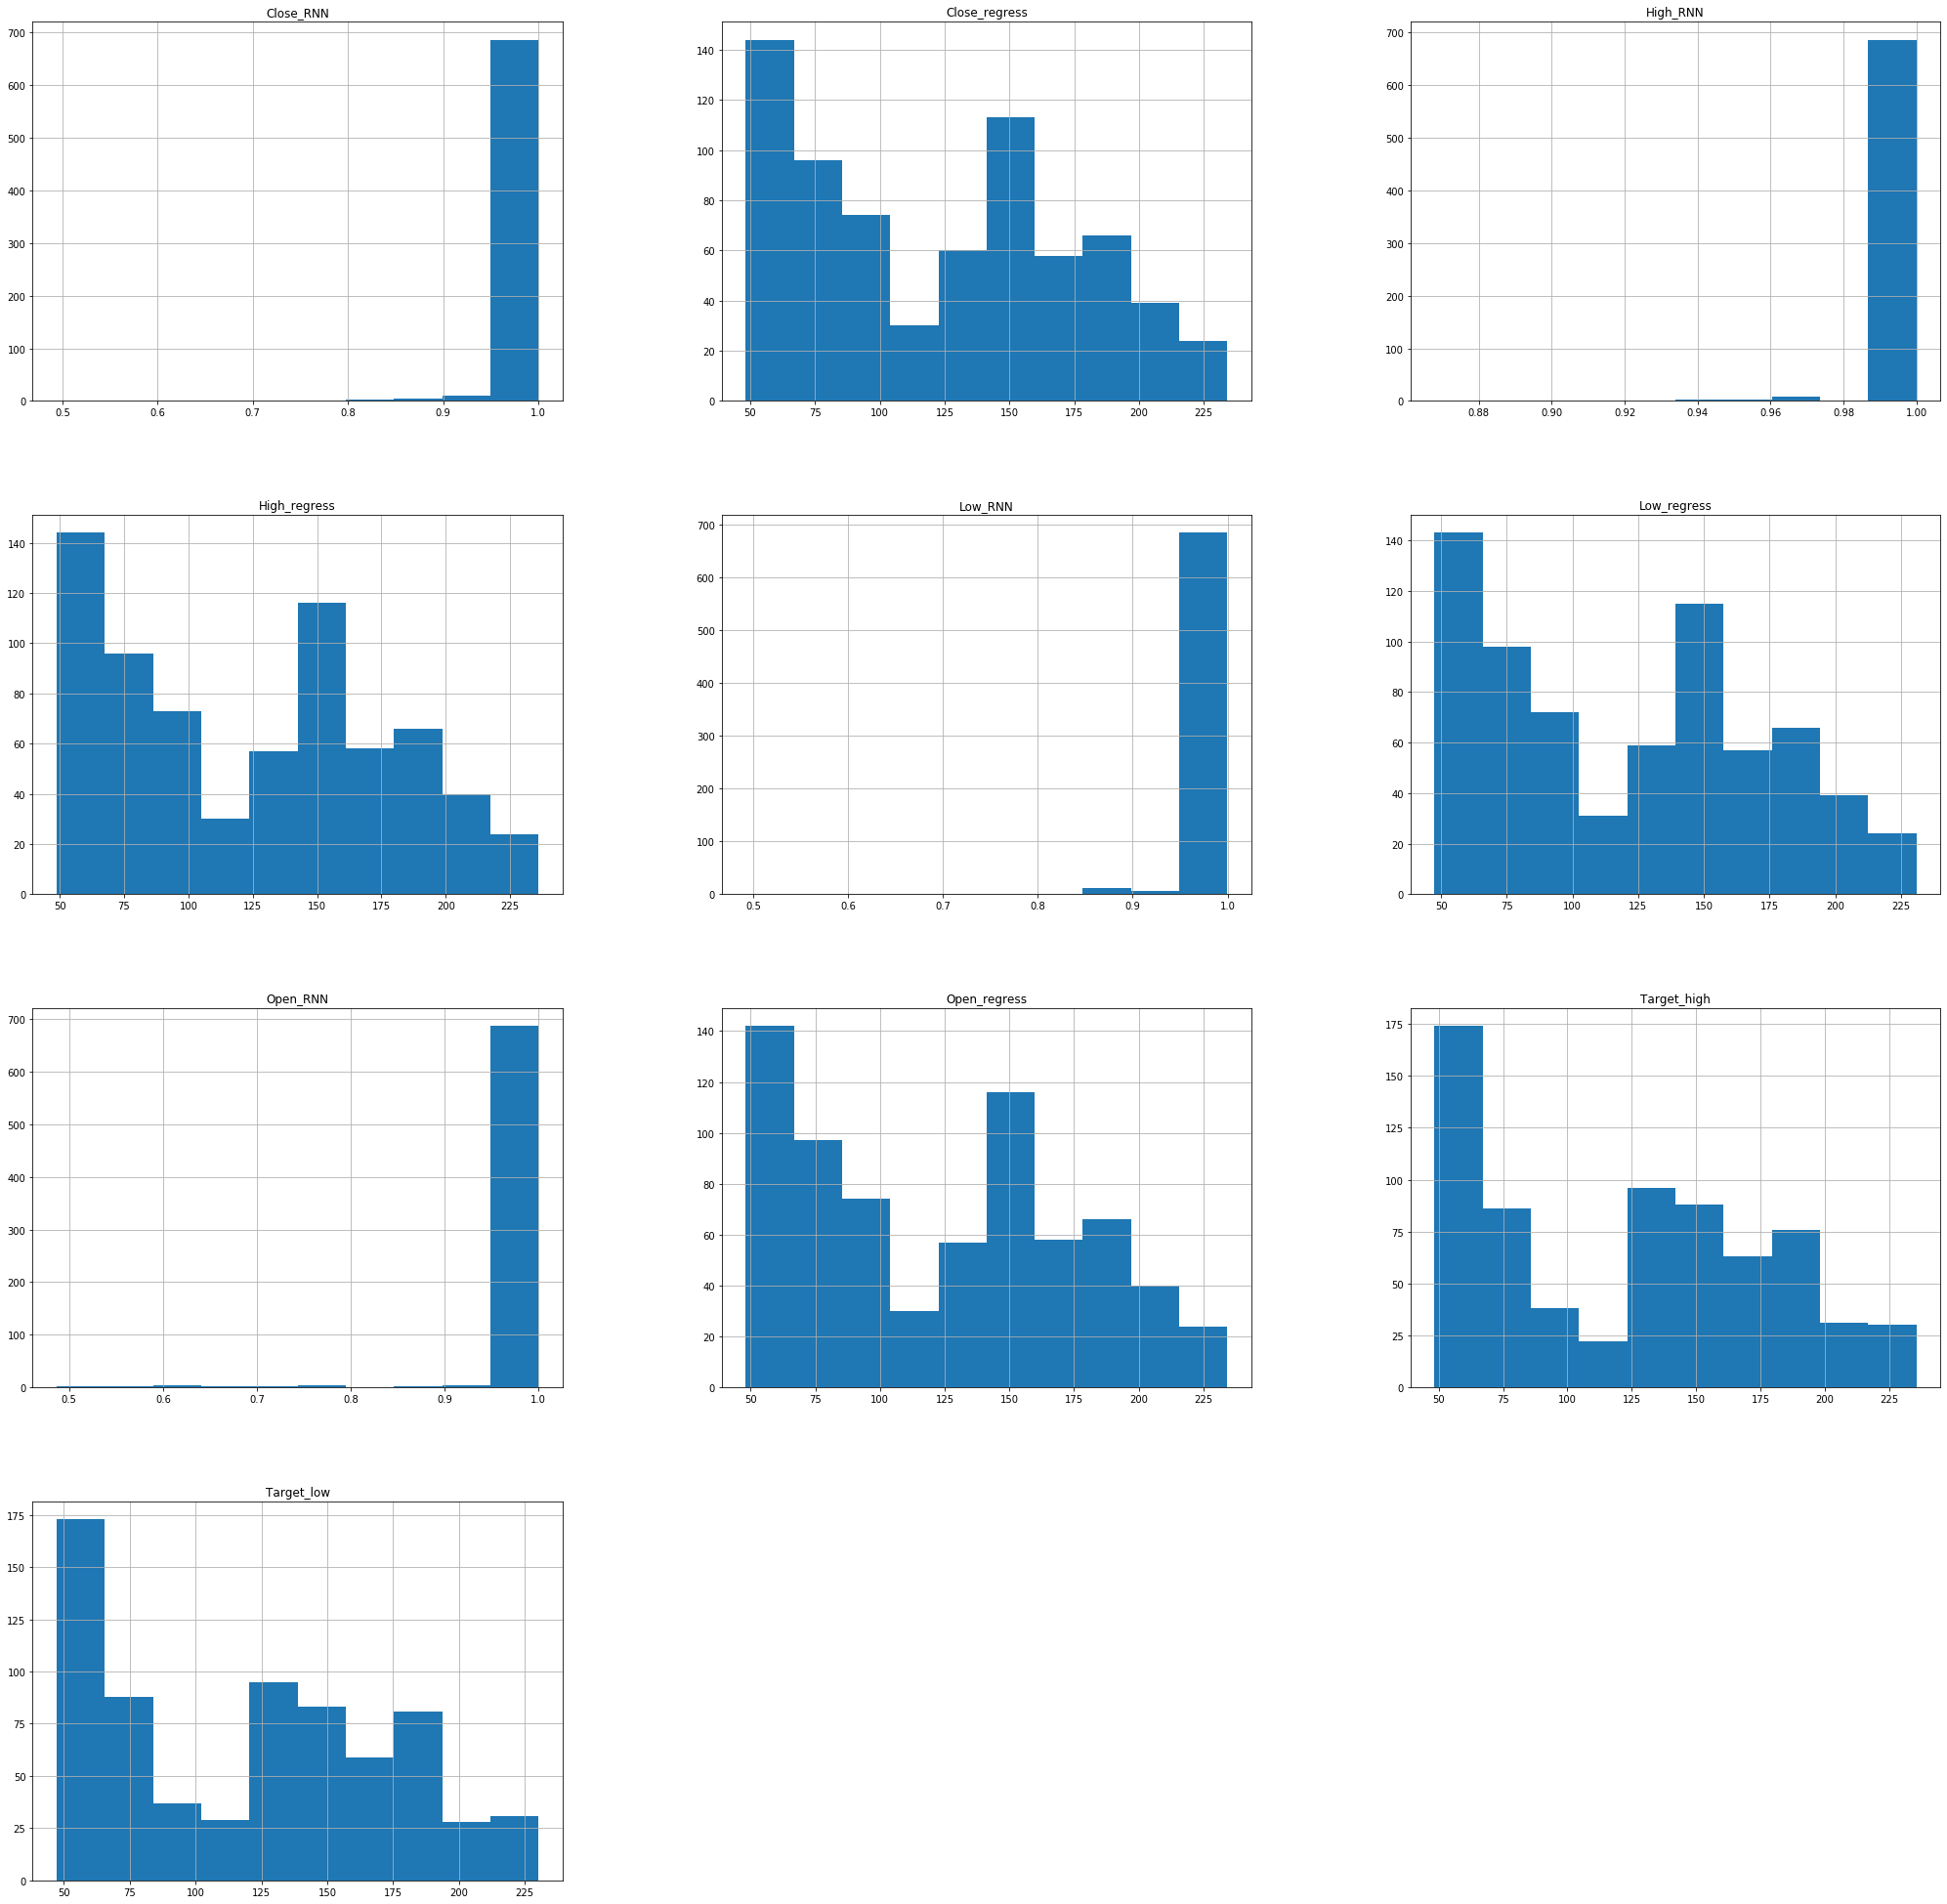

In [194]:
df['Target_high']=target_high
df['Target_low']=target_low

df.to_csv('feature.csv',index=False)
df_main=pd.read_csv('feature.csv')
X_Df=df_main[['High_regress','Low_regress','Open_regress','Close_regress','High_RNN','Low_RNN','Open_RNN','Close_RNN']].values
df_main.hist(figsize = (35,35))
plt.show()

In [195]:
y_Df=df_main[['Target_high','Target_low']].values
sc_2 = MinMaxScaler(feature_range = (0, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Df, y_Df, test_size=0.3)
X_train_scaled=sc_2.fit_transform(X_train)

In [196]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 8, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(2, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [197]:
import tensorflow as tf
model_ANN=model()
callback=tf.keras.callbacks.ModelCheckpoint(filepath='ANN_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=model_ANN.fit(X_train,y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_71 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 258       
Total params: 10,978
Trainable params: 10,978
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
16/16 [==============================] - 1s 2ms/step - loss: 122.7117 - accuracy: 0.0000e+00 - mean_absolute_error: 122.7117
Epoch 2/2000
16/16 [==============================] - 0s 2ms/step - loss: 110.7310 - accuracy: 0.0000e+00 - m

In [198]:
X_test_scaled=sc_2.transform(X_test)
y_pred=model_ANN.predict(X_test)


In [227]:
rmsANN_high=np.sqrt(np.mean(np.power((np.array(y_test[0])-np.array(y_pred[0])),2)))

In [228]:
rmsANN_high

9.227310687301904

In [230]:
rmsANN_low=np.sqrt(np.mean(np.power((np.array(y_test[1])-np.array(y_pred[1])),2)))
rmsANN_low

7.276300060681007

In [201]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,2):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

In [202]:
df_res=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_test_mod[0],y_test_mod[1])),columns=['Pred_high','Pred_low','Actual_high','Actual_low'])

In [203]:
df_res.head()

,Pred_high,Pred_low,Actual_high,Actual_low
0,58.436237,56.948376,49.200001,47.730000
1,141.936356,138.761612,148.929993,146.309998
2,98.030289,95.742561,103.120003,101.500000
3,141.135574,137.977036,146.899994,141.070007
4,89.488136,87.372963,80.519997,78.320000


In [205]:
df_res

,Pred_high,Pred_low,Actual_high,Actual_low
0,58.436237,56.948376,49.200001,47.730000
1,141.936356,138.761612,148.929993,146.309998
2,98.030289,95.742561,103.120003,101.500000
3,141.135574,137.977036,146.899994,141.070007
4,89.488136,87.372963,80.519997,78.320000
...,...,...,...,...
207,241.035538,235.857986,231.750000,227.529999
208,89.881371,87.758354,106.459999,103.800003
209,70.026474,68.304398,63.209999,61.740002
210,91.358856,89.205719,81.029999,79.779999


In [212]:
df_res_2=df_res[75:125]

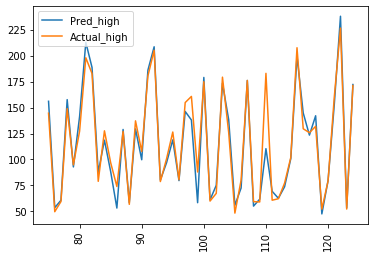

In [213]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

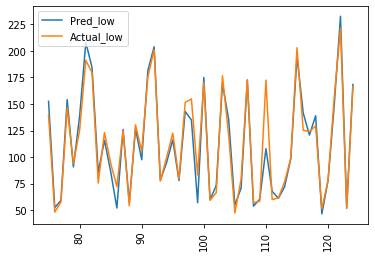

In [214]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

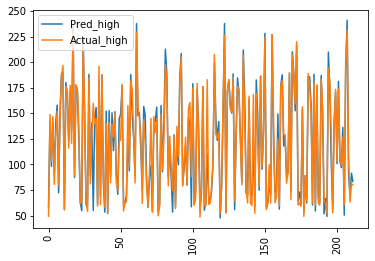

In [215]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res.index, df_res['Pred_high'], label="Pred_high")
ax1.plot(df_res.index, df_res['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

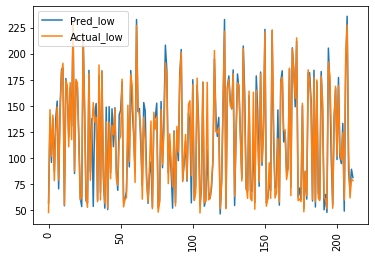

In [216]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res.index, df_res['Pred_low'], label="Pred_low")
ax1.plot(df_res.index, df_res['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

Low_ANN

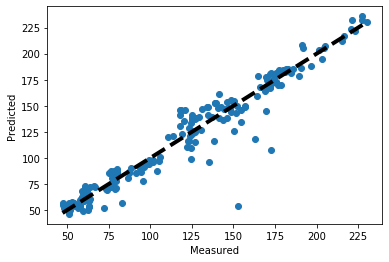

In [217]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

High ANN

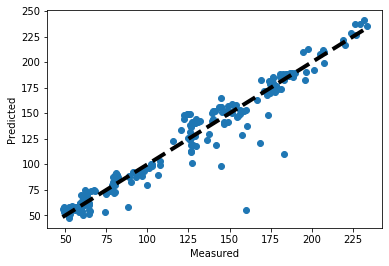

In [218]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# AUTO-ARIMA (Past analysis)

In [351]:
from pmdarima import auto_arima

In [352]:
df1=pd.read_csv('dataset_target.csv')
df2=pd.read_csv('dataset_target_2.csv')
df_main=df2.drop(['Date'],axis=1)
df_train=df_main[:603]
df_test=df_main[603:]

sc = MinMaxScaler(feature_range = (0, 1))

df_target_train=df_train[['High','Low','Open','Close']]
df_target_test=df_train[['High','Low','Open','Close']]

target_set=df_target.values
train_set=df_train.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)



In [363]:
modelAutoHigh = auto_arima(df_train['High'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
modelAutoLow = auto_arima(df_train['Low'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
modelAutoOpen = auto_arima(df_train['Open'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
modelAutoClose = auto_arima(df_train['Close'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3132.851, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3004.699, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3134.806, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2955.640, Time=0.44 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2953.642, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3002.811, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2955.640, Time=0.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2957.640, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=2955.6

In [420]:
modelautoh = modelAutoHigh.fit(df_train['High'])
modelautol = modelAutoLow.fit(df_train['Low'])
modelautoo = modelAutoOpen.fit(df_train['Open'])
modelautoc = modelAutoClose.fit(df_train['Close'])


AttributeError: 'ARIMA' object has no attribute 'save'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


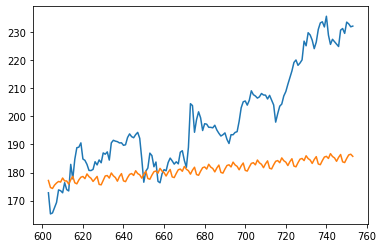

In [416]:
import matplotlib.pyplot as plt
predict = df_test[['High','Low','Open','Close']]

predictHigh = modelautoh.predict(n_periods=len(df_test['High']))
predict['High'] = pd.DataFrame(predictHigh,index = df_test['High'].index,columns=['Prediction'])

plt.plot(df_test['High'], label='Test')
plt.plot(predict['High'], label='Prediction')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


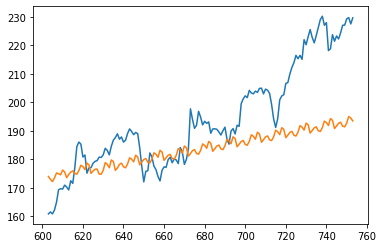

In [417]:
predictLow = modelautol.predict(n_periods=len(df_test['Low']))
predict['Low'] = pd.DataFrame(predictLow,index = df_test['Low'].index,columns=['Prediction'])

plt.plot(df_test['Low'], label='Test')
plt.plot(predict['Low'], label='Prediction')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


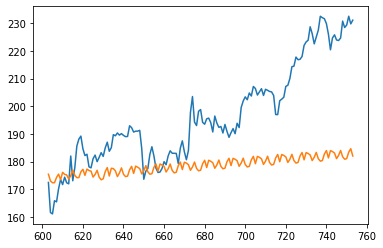

In [418]:
predictOpen = modelautoo.predict(n_periods=len(df_test['Open']))
predict['Open'] = pd.DataFrame(predictOpen,index = df_test['Open'].index,columns=['Prediction'])

plt.plot(df_test['Open'], label='Test')
plt.plot(predict['Open'], label='Prediction')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


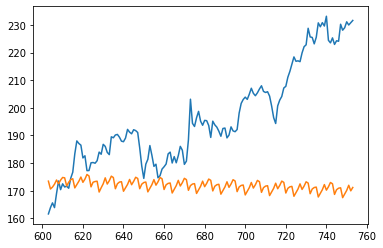

In [419]:
predictClose = modelautoc.predict(n_periods=len(df_test['Close']))
predict['Close'] = pd.DataFrame(predictClose,index = df_test['Close'].index,columns=['Prediction'])

plt.plot(df_test['Close'], label='Test')
plt.plot(predict['Close'], label='Prediction')
plt.show()

In [398]:
df_test_y = df_test[['High','Low','Open','Close']]

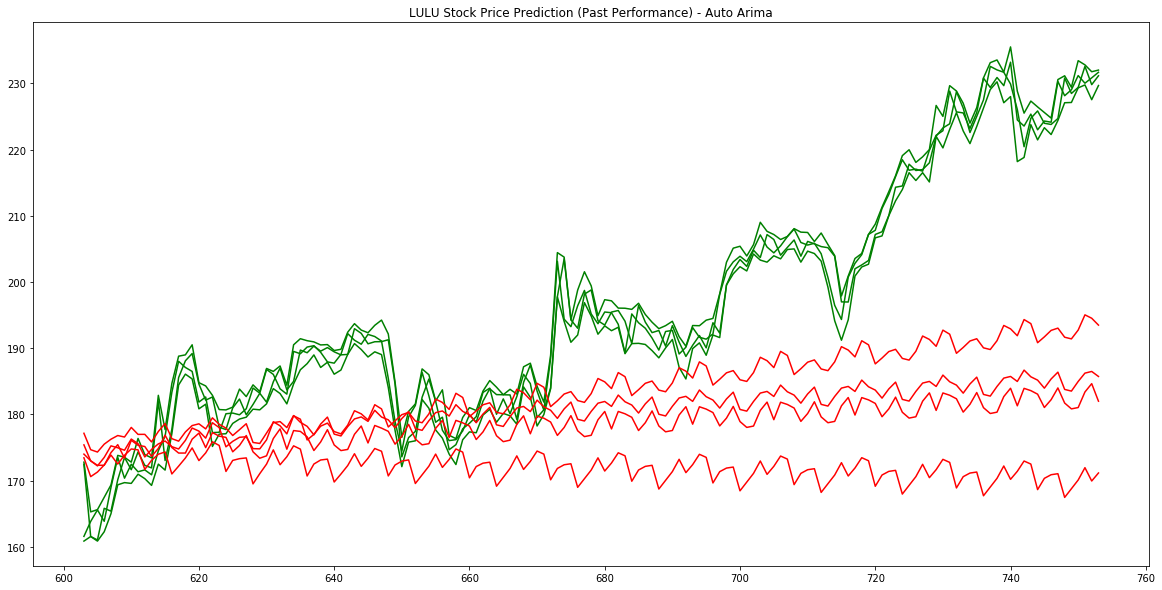

In [449]:
plt.figure(figsize=(20,10))
# plt.plot(df_train, label='Train', color = 'green')
plt.plot(df_test_y, color = 'green', label = 'Real LULU stock')
plt.plot(predict, color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction (Past Performance) - Auto Arima')
plt.show()

In [451]:
rmsAA=np.sqrt(np.mean(np.power((np.array(df_test_y)-np.array(predict)),2)))
print("rmsAA: ", rmsAA)

rmsAA:  24.045023197678276


# Prophet

In [433]:
from fbprophet import Prophet

In [435]:
df1=pd.read_csv('dataset_target.csv')
df2=pd.read_csv('dataset_target_2.csv')
new_data_close = df2[['Date', 'Close']]
new_data_open = df2[['Date', 'Open']]
new_data_low = df2[['Date', 'Low']]
new_data_high = df2[['Date', 'High']]

new_data_close.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
new_data_open.rename(columns={'Open': 'y', 'Date': 'ds'}, inplace=True)
new_data_low.rename(columns={'Low': 'y', 'Date': 'ds'}, inplace=True)
new_data_high.rename(columns={'High': 'y', 'Date': 'ds'}, inplace=True)

trainC = new_data_close[:603]
testC = new_data_close[603:]

trainO = new_data_open[:603]
testO = new_data_open[603:]

trainL = new_data_low[:603]
testL = new_data_low[603:]

trainH = new_data_high[:603]
testH = new_data_high[603:]

modelC = Prophet()
modelC.fit(trainC)

modelO = Prophet()
modelO.fit(trainO)

modelL = Prophet()
modelL.fit(trainL)

modelH = Prophet()
modelH.fit(trainH)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [455]:
forcast = df_test[['High','Low','Open','Close']]
close_prices = modelC.make_future_dataframe(periods=len(testC))
forecastC = modelC.predict(close_prices)
forecastC_test = forecastC['yhat'][603:]
forcast['Close'] = forecastC_test
rmsC=np.sqrt(np.mean(np.power((np.array(testC['y'])-np.array(forecastC_test)),2)))
print("RMSC: ", rmsC)

open_prices = modelO.make_future_dataframe(periods=len(testO))
forecastO = modelO.predict(open_prices)
forecastO_test = forecastO['yhat'][603:]
forcast['Open'] = forecastO_test
rmsO=np.sqrt(np.mean(np.power((np.array(testO['y'])-np.array(forecastO_test)),2)))
print("RMSO: ", rmsO)

low_prices = modelL.make_future_dataframe(periods=len(testL))
forecastL = modelL.predict(low_prices)
forecastL_test = forecastL['yhat'][603:]
forcast['Low'] = forecastL_test
rmsL=np.sqrt(np.mean(np.power((np.array(testL['y'])-np.array(forecastL_test)),2)))
print("RMSL: ", rmsL)

high_prices = modelH.make_future_dataframe(periods=len(testH))
forecastH = modelH.predict(high_prices)
forecastH_test = forecastH['yhat'][603:]
forcast['High'] = forecastH_test
rmsH=np.sqrt(np.mean(np.power((np.array(testH['y'])-np.array(forecastH_test)),2)))
print("RMSH: ", rmsH)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


RMSC:  24.419792716454


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


RMSO:  24.23071117757031


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSL:  24.79744613007791
RMSH:  23.631093415708474


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


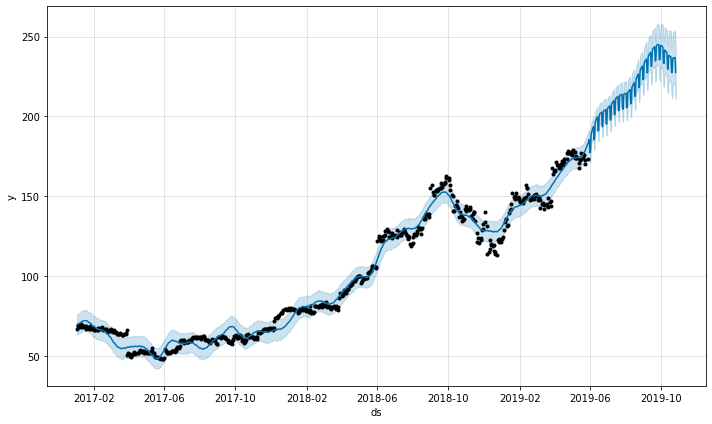

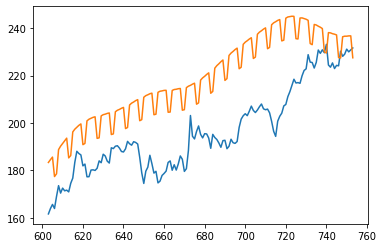

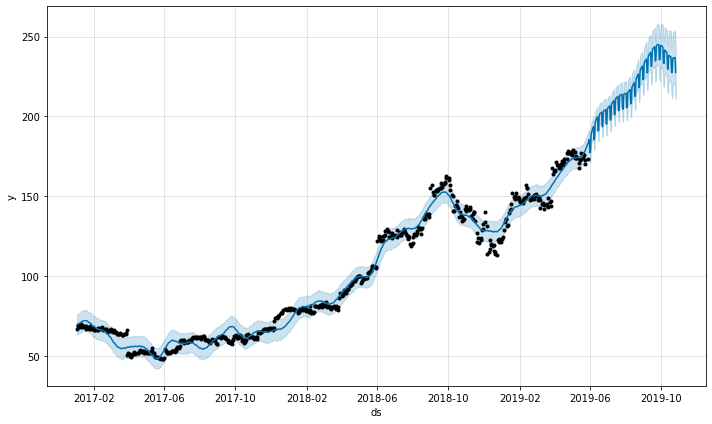

In [443]:
testC['Predictions'] = 0
testC['Predictions'] = forecastC_test.values

plt.plot(testC[['y', 'Predictions']])
modelC.plot(forecastC)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


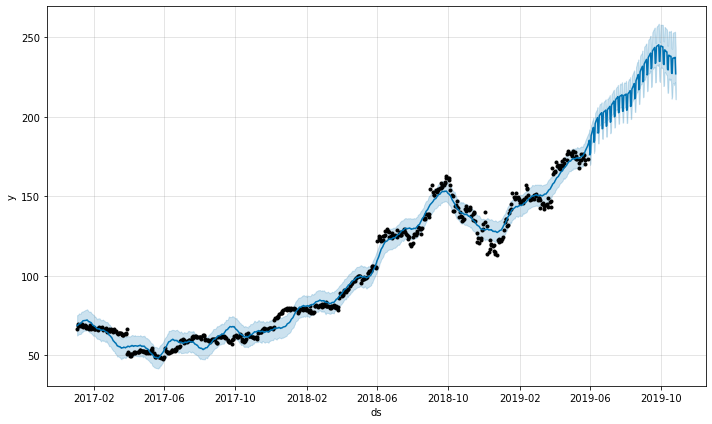

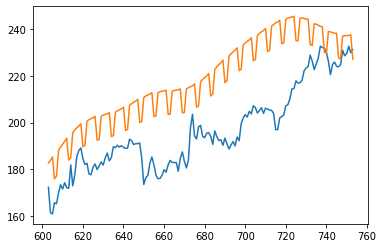

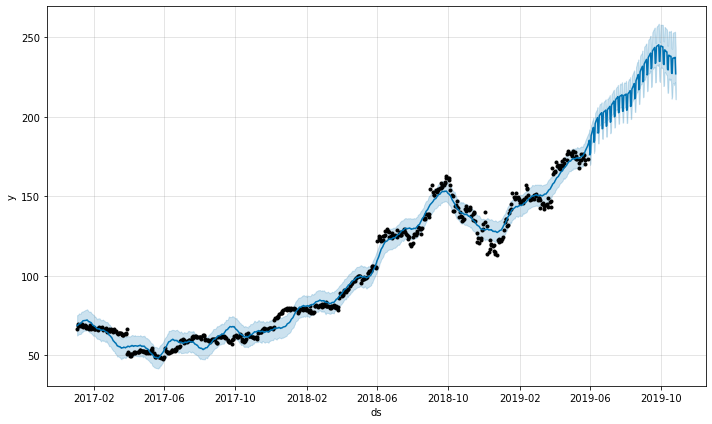

In [446]:
testO['Predictions'] = 0
testO['Predictions'] = forecastO_test.values

plt.plot(testO[['y', 'Predictions']])
modelC.plot(forecastO)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


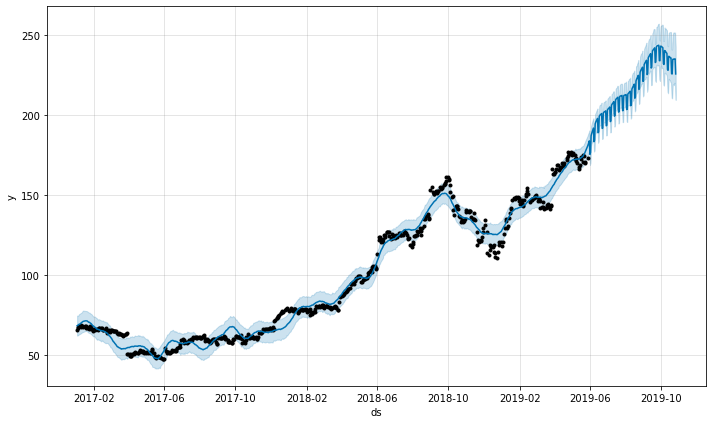

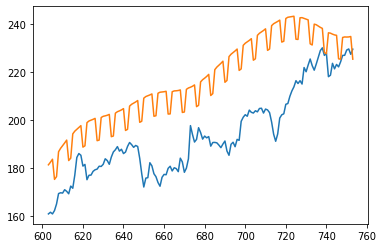

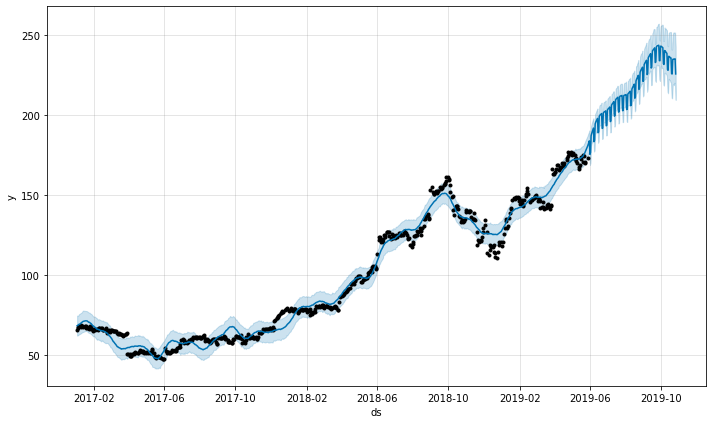

In [447]:
testL['Predictions'] = 0
testL['Predictions'] = forecastL_test.values

plt.plot(testL[['y', 'Predictions']])
modelL.plot(forecastL)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


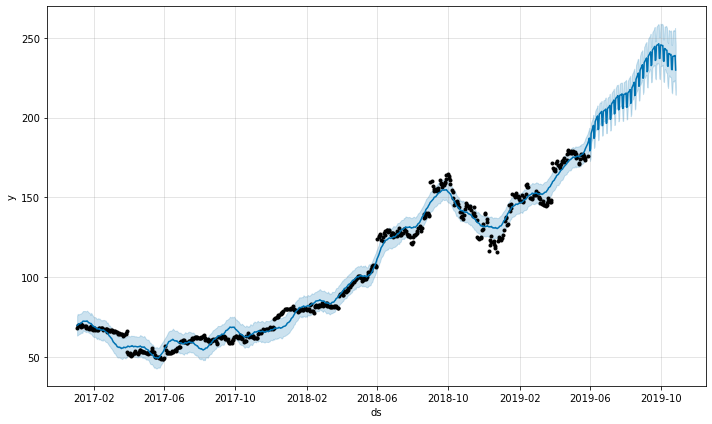

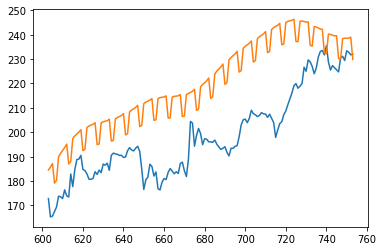

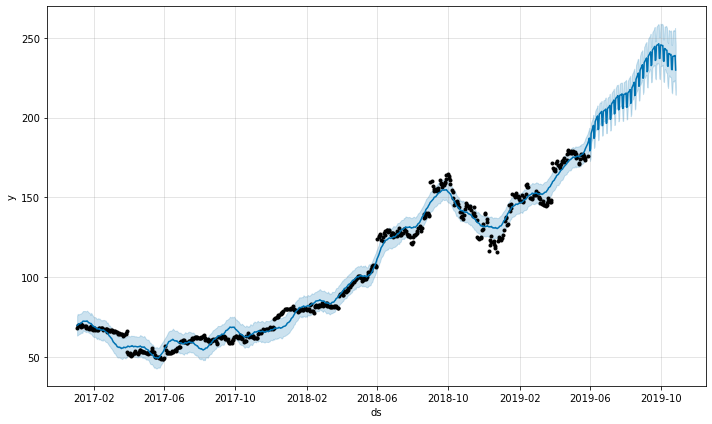

In [448]:
testH['Predictions'] = 0
testH['Predictions'] = forecastH_test.values

plt.plot(testH[['y', 'Predictions']])
modelH.plot(forecastH)

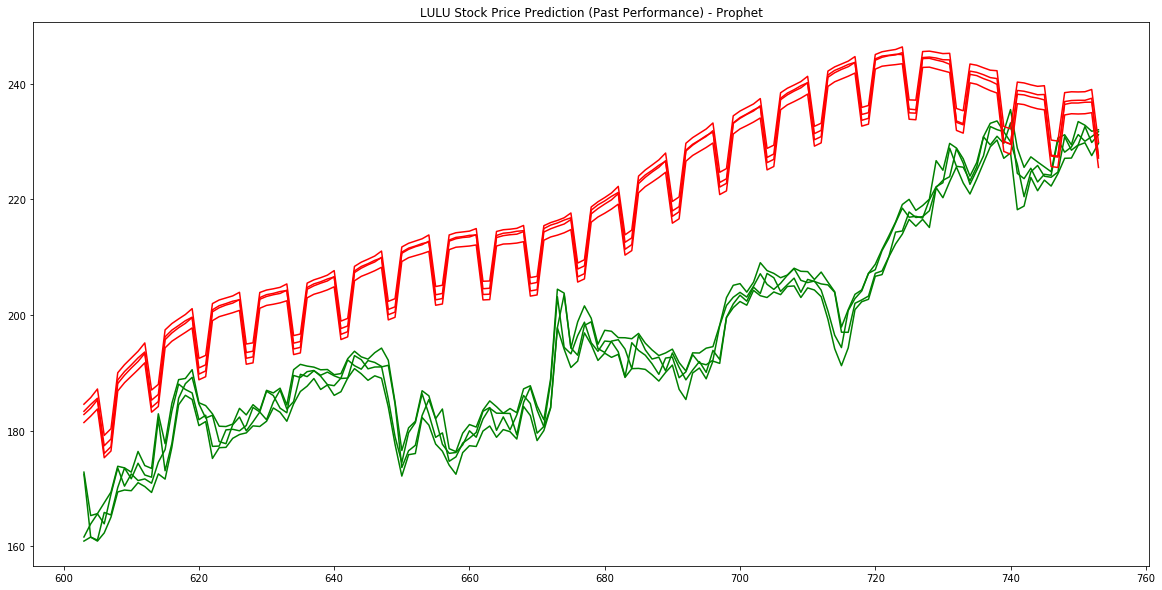

In [457]:



testProphet = df2[['High','Low','Open','Close']][603:]

plt.figure(figsize=(20,10))
plt.plot(testProphet, color = 'green', label = 'Real LULU stock')
plt.plot(forcast, color = 'red', label = 'Predicted LULU Stock Price')
plt.title('LULU Stock Price Prediction (Past Performance) - Prophet')
plt.show()